In [6]:
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from statsmodels.tools.eval_measures import rmse
sns.set(rc={'figure.figsize':(11.7,8.27)})
cps_df = pd.read_stata("cps08 (for Tutorial 2).dta")
xyz_df = pd.read_stata("xyz_data (for Tutorial 2).dta")

LinregressResult(slope=0.6049862935376472, intercept=1.0822765749094145, rvalue=0.17036365524127103, pvalue=2.6346275412400244e-51, stderr=0.03985417845688793)
                            OLS Regression Results                            
Dep. Variable:                    ahe   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           2.63e-51
Time:                        21:34:43   Log-Likelihood:                -28689.
No. Observations:                7711   AIC:                         5.738e+04
Df Residuals:                    7709   BIC:                         5.740e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

<AxesSubplot:xlabel='age', ylabel='ahe'>

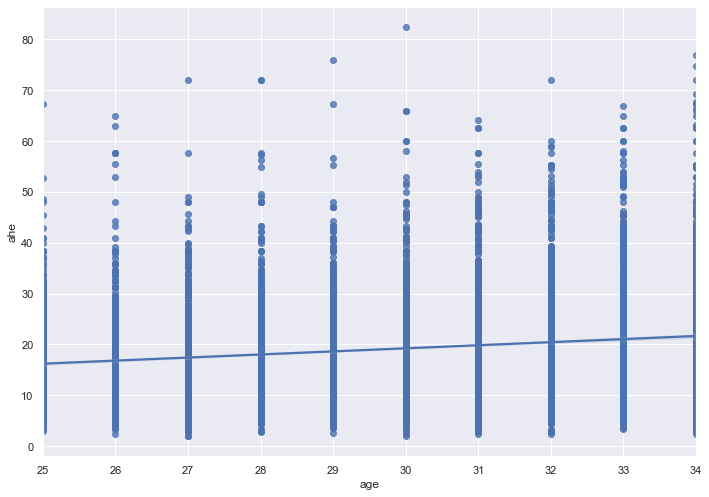

In [48]:
Y = cps_df["ahe"]
X = cps_df["age"]

regression = sp.stats.linregress(X, Y)
print(regression)
lm = smf.ols(formula="ahe ~ age", data=cps_df).fit()
print(lm.summary())

print(f"RMSE = {rmse(Y, lm.predict(X))}")
print(f"Ah Teck: {regression.intercept + regression.slope * (26)}")
print(f"Ravin: {regression.intercept + regression.slope * (30)}")

sns.regplot(x=X, y=Y, data=cps_df)

In [28]:
cps_df.head()

,ahe,year,bachelor,female,age
0,38.461540,2008.0,1.0,0.0,33.0
1,12.500000,2008.0,1.0,0.0,31.0
2,9.857142,2008.0,0.0,0.0,30.0
3,8.241758,2008.0,0.0,0.0,30.0
4,17.788462,2008.0,0.0,0.0,31.0


                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     34.02
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           7.03e-08
Time:                        20:30:12   Log-Likelihood:                -116.35
No. Observations:                 100   AIC:                             236.7
Df Residuals:                      98   BIC:                             241.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2900      0.091     -3.173      0.0

<AxesSubplot:xlabel='y', ylabel='z'>

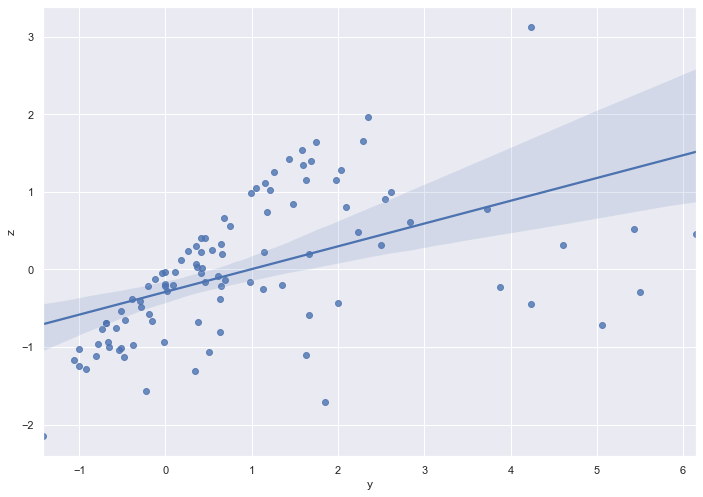

In [39]:
X = xyz_df["y"]
Y = xyz_df["z"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())
print(f"RMSE = {rmse(Y, predictions)}")

sns.regplot(x="y", y="z", data=xyz_df)

In [22]:
xyz_df.head()

,x,y,z
0,-0.535227,0.355428,0.068960
1,-0.698546,-0.521056,-1.009023
2,1.499984,1.666876,-0.583075
3,1.027679,0.372303,-0.683821
4,0.434861,0.750021,0.560917
